In [51]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline


In [52]:
#funkcije
def target(x):
    return 5*x

def Sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def Error(h,Y):
    return ((h-Y)**2)

#Error = np.vectorize(Error)

def dError(E):
    return 2 * (E)

def setUpW(L):
    W = []
    n = len(L)-1
    for i in range (0,n):
        W.append(0.2 * np.random.randn(L[i+1],L[i]))
        W[i] -= np.mean(W[i])
    return W
def setUpB(L):
    B = []
    n = len(L)-1
    for i in range (0,n):
        B.append(0.2 * np.random.randn(L[i+1],1))
        B[i] -= np.mean(B[i]) 
    return B

def forward(X,Y,W,B,L):
    H = []
    A = []
    n = len(L)-1
    for i in range(0,n):
        if i == 0:
            A.append(copy.deepcopy(X))
            H.append(copy.deepcopy(X))
            a = W[i].dot(X)+ B[i]
            A.append(a)
            h = Sigmoid(a)
            H.append(h)
        elif i == n-1:
            a = np.dot(W[i],h) + B[i]
            A.append(a)
            h = a
            H.append(h)            
        else:
            a = W[i].dot(h) + B[i]
            A.append(a)
            h = Sigmoid(a)
            H.append(h)
    return (A,H)

def backward(A,H,E,W,B,L,reg_param):
    
    d = dError(E)
    k = len(L)-1
    n = len(L)-1
    dB = []
    dW = []
    while k>0:
        #print (k)
        if k == len(L) -1:
            d = d * np.ones(H[k].shape)
        else:
            d= d * ( 1 - H[k]) * (H[k])
            
        
        dB.insert(0,d + reg_param * 2 * np.abs(H[n]) ) #  reg_param * 2 * H[len(L)-1] je izvod regularizacije
        dW.insert(0,d*((H[k-1].T)) + reg_param * 2 * np.abs(H[n]) )
   
        d = W[k-1].T.dot(d)
        k = k-1
    return (dW,dB)

def iteracija(X,Y,W,B,L,ni,reg_param):
    (A,H) = forward(X,Y,W,B,L)
    h = H[len(L)-1]
    E = Error(h,Y)
    C = E + reg_param * h**2
    (dW,dB) = backward(A,H,E,W,B,L,reg_param)
    #print (dW)
    Wr = []
    Br = []
    k = len(W)
    for i in range(0, k):
        Wr.append( W[i] - ni * dW[i])
        Br.append( B[i] - ni * dB[i])
    return (A,H,E,Wr,Br,C)

In [53]:
#inicijalizacija
L = [2,18,9,4,1]

W = setUpW(L)
B = setUpB(L)
ni = 1e-3

len(L)

5

In [54]:
reg_param = .01

In [55]:
#init trening podataka
input_size = 100

Y = np.empty([input_size])
X = np.random.randn(input_size,L[0],1)
X[:] -= np.mean(X[:],axis=0)
Y = X[:,0,0]


In [56]:
#treniranje
niz = np.empty([input_size])
for i in (0,input_size-1):
    (A,H,E,W,B,C) = iteracija(X[i],Y[i],W,B,L,ni,reg_param)
    niz[i] =C
niz

array([  4.29858460e-001,   4.94065646e-324,   9.88131292e-324,
         1.48219694e-323,   1.97626258e-323,   2.47032823e-323,
         2.96439388e-323,   3.45845952e-323,   3.95252517e-323,
         4.44659081e-323,   4.94065646e-323,   5.43472210e-323,
         5.92878775e-323,   6.42285340e-323,   6.91691904e-323,
         7.41098469e-323,   7.90505033e-323,   8.39911598e-323,
         8.89318163e-323,   9.38724727e-323,   9.88131292e-323,
         1.03753786e-322,   1.08694442e-322,   1.13635099e-322,
         1.18575755e-322,   1.23516411e-322,   1.28457068e-322,
         1.33397724e-322,   1.38338381e-322,   1.43279037e-322,
         1.48219694e-322,   1.53160350e-322,   1.58101007e-322,
         1.63041663e-322,   1.67982320e-322,   1.72922976e-322,
         1.77863633e-322,   1.82804289e-322,   1.87744945e-322,
         1.92685602e-322,   1.97626258e-322,   2.02566915e-322,
         2.07507571e-322,   2.12448228e-322,   2.17388884e-322,
         2.22329541e-322,   2.27270197e-

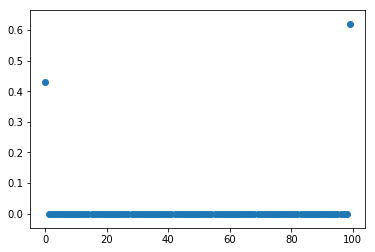

In [57]:
plt.scatter(np.arange(input_size),(niz))
#plt.ylim([-0.1,1000])

In [58]:
(A,H) = forward(np.array([[-0.7],[0.85]]),Y,W,B,L)

In [59]:
H

[array([[-0.7 ],
        [ 0.85]]), array([[ 0.48166632],
        [ 0.45369068],
        [ 0.52889367],
        [ 0.44583537],
        [ 0.58509784],
        [ 0.43789889],
        [ 0.44782   ],
        [ 0.55398521],
        [ 0.46611845],
        [ 0.515679  ],
        [ 0.4871335 ],
        [ 0.42262359],
        [ 0.40133114],
        [ 0.53558797],
        [ 0.48255995],
        [ 0.36708671],
        [ 0.41496254],
        [ 0.54962194]]), array([[ 0.33279636],
        [ 0.43077048],
        [ 0.32249982],
        [ 0.65512894],
        [ 0.5796102 ],
        [ 0.46382474],
        [ 0.55481671],
        [ 0.60877468],
        [ 0.5387949 ]]), array([[ 0.44518539],
        [ 0.41876395],
        [ 0.55036754],
        [ 0.57639637]]), array([[-0.03175895]])]

In [60]:
test_size = 50

Yt = np.empty([test_size])
Xt = np.random.randn(test_size,L[0],1)
Xt -= np.mean(Xt,axis=0)
Yt = Xt[:,0,0]


In [61]:
nizT = np.empty([test_size])
for i in (0,test_size-1):
    (A,H) = forward(Xt[i],Yt[i],W,B,L)
    nizT[i] =( H[len(L)-1])
H

[array([[-0.57107973],
        [ 0.37386861]]), array([[ 0.47352894],
        [ 0.47821726],
        [ 0.54049702],
        [ 0.45608621],
        [ 0.58825405],
        [ 0.49782435],
        [ 0.48775735],
        [ 0.53716321],
        [ 0.4768897 ],
        [ 0.5338465 ],
        [ 0.48929367],
        [ 0.44010837],
        [ 0.42938149],
        [ 0.52269446],
        [ 0.45235241],
        [ 0.39586637],
        [ 0.39249073],
        [ 0.54978429]]), array([[ 0.32640769],
        [ 0.42775818],
        [ 0.32345731],
        [ 0.65307911],
        [ 0.58039416],
        [ 0.46203832],
        [ 0.55907449],
        [ 0.60552305],
        [ 0.53514553]]), array([[ 0.4443365 ],
        [ 0.41912911],
        [ 0.55053425],
        [ 0.57564917]]), array([[-0.03178954]])]

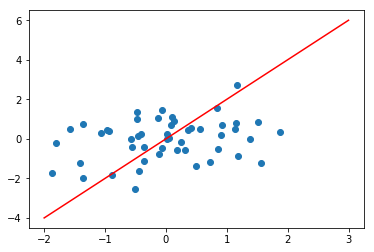

In [62]:
plt.scatter(Yt,nizT)
plt.plot(np.arange(-2,4), 2* np.arange(-2,4),color ="r")
#plt.ylim([-2,4])

In [63]:
i =0
W

[array([[-0.05320252,  0.0540961 ],
        [ 0.15469794, -0.16516417],
        [ 0.220818  , -0.03816633],
        [-0.0839638 , -0.10969196],
        [-0.04188332, -0.03867763],
        [ 0.02196108, -0.50019765],
        [-0.02227747, -0.34312875],
        [ 0.13677457,  0.17955422],
        [ 0.11688461, -0.05913976],
        [ 0.01851815, -0.14800416],
        [-0.10898742, -0.04766792],
        [-0.10398755, -0.17788433],
        [ 0.07238312, -0.22307917],
        [ 0.03869238,  0.11917079],
        [ 0.17273387,  0.30170418],
        [ 0.30307406, -0.17420453],
        [ 0.28262922,  0.27262122],
        [-0.02019793, -0.00684646]]),
 array([[ -8.73074760e-02,   5.63011951e-03,  -1.87526089e-01,
           3.73583884e-02,  -9.24331618e-02,   2.16844209e-01,
           7.62153252e-02,   8.65199427e-02,  -1.36013253e-01,
          -1.90917240e-01,  -2.51146303e-01,  -2.76709906e-01,
          -4.33527770e-01,  -5.81351473e-01,   6.73762415e-01,
          -3.61385361e-02,   2.6165